In [1]:
import pandas as pd

### Analysis

Change the folder either to `instagram_data/` or to `twitter_data/`

In [2]:
folder  = 'twitter_data/' #twitter_data/ or instagram_data/

In [12]:
data = pd.read_csv(folder +'posts_processed.csv')
green = pd.read_csv(folder +'green_posts_processed.csv')

/var/folders/pv/j2wxhdx50y5fbwqrc2yxqwf00000gn/T/ipykernel_72815/1928277876.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(folder +'posts_processed.csv')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306131 entries, 0 to 306130
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   possibly_sensitive         306131 non-null  bool   
 1   tweets_original            306131 non-null  object 
 2   source                     305668 non-null  object 
 3   lang                       306131 non-null  object 
 4   created_at                 306131 non-null  object 
 5   id                         306131 non-null  int64  
 6   author                     306131 non-null  object 
 7   Branche                    306131 non-null  object 
 8   Branche-6                  306131 non-null  object 
 9   Sektor                     306131 non-null  float64
 10  B2B                        306131 non-null  bool   
 11  B2C                        306131 non-null  bool   
 12  likes                      306131 non-null  int64  
 13  retweets                   30

Uncomment the following for getting a random sample of the data (e.g. for creating a test set or looking at a random sample)

In [37]:
'''
green_push_factor = 10 #a sustainable tweet is sampled green_push_factor times more frequently than usual, choose 1 for same distribution as the original
num_tweets = 1000 #change to your needs 

dateTimeObj = str(datetime.now()).replace(" ","-").replace(":","-").replace(".","-")
data['green_weight'] = data['green'].apply(lambda x: green_push_factor if x else 1) 
data.sample(num_tweets, weights=data.green_weight).to_csv('sample_'+str(num_tweets)+"_"+dateTimeObj+'.csv', header=True, index=False, columns=list(data.axes[1]))
'''

'\ngreen_push_factor = 10 #a sustainable tweet is sampled green_push_factor times more frequently than usual, choose 1 for same distribution as the original\nnum_tweets = 1000 #change to your needs \n\ndateTimeObj = str(datetime.now()).replace(" ","-").replace(":","-").replace(".","-")\ndata[\'green_weight\'] = data[\'green\'].apply(lambda x: green_push_factor if x else 1) \ndata.sample(num_tweets, weights=data.green_weight).to_csv(\'sample_\'+str(num_tweets)+"_"+dateTimeObj+\'.csv\', header=True, index=False, columns=list(data.axes[1]))\n'

### Analyse grouped data

#### Boxplot

Set the desired metric, category grouping (groupby) and dataset as proposed in the comments

Text(0, 0.5, 'likes')

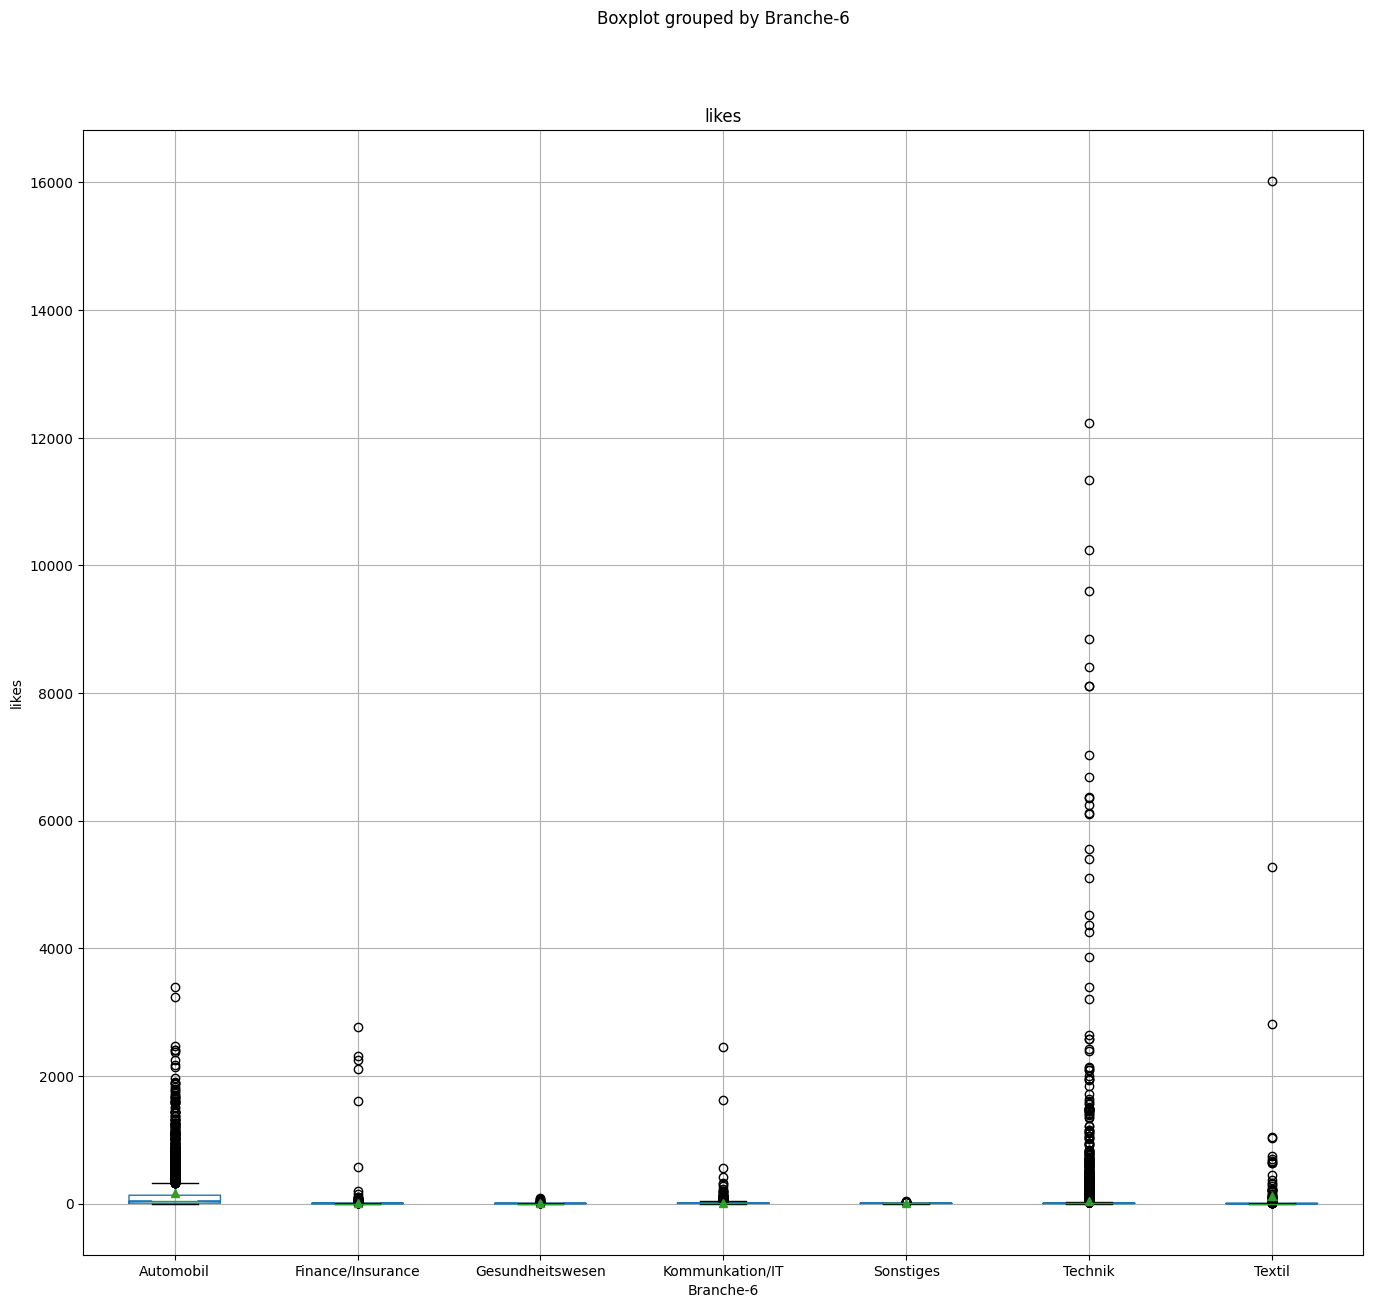

In [16]:
metric = "likes" #options: use "likes", "year", for twitter: "more_information_provided", "retweets", "quotes", "replies", for instagram: "comments"
groupby = "Branche-6" #options: use "Branche-6", "green", "author", "B2C" or "year" (when using "author", set the rot variable in boxplot to 90)
#options: green or data
boxplot = green.boxplot([metric], by = [groupby],
                     figsize = (16, 15),
                     showmeans = True,
                     notch = True, 
                     rot=0 # set to 90 in case of more than 10 categories (e.g. author)
                     )
boxplot.set_xlabel(groupby)
boxplot.set_ylabel(metric)

#### Line/Bar Chart
Set the following variables to your needs and run the next three cells

In [17]:
groupby = 'year' #options: use "Branche-6", "green", "author", "B2C" or "year"
column = 'post_text'
factor = 10
line_chart = True # set false for bar chart
figsize = (18,8)

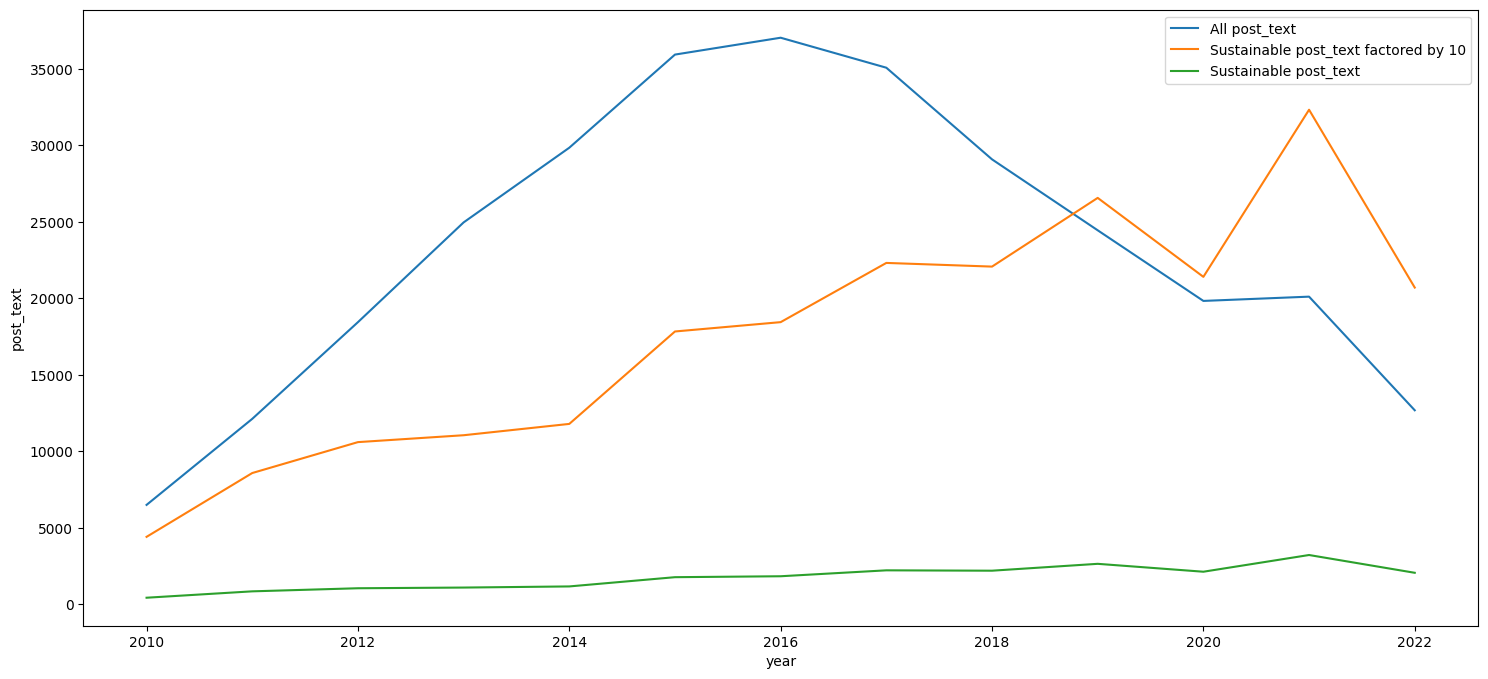

In [18]:
if line_chart:
    ax = data.groupby([groupby]).count()[column].plot(label='All '+column)
    green.groupby([groupby]).count()[column].multiply(10).plot(ax=ax, label='Sustainable '+column+' factored by 10')
    green.groupby([groupby]).count()[column].plot(figsize=figsize,ax=ax, label='Sustainable '+column, rot = 0) #set rot = 90 for turning the labels horizontally
else:
    #ax = data.groupby([groupby]).count()[column].plot.bar(label='All '+column)
    #green.groupby([groupby]).count()[column].multiply(10).plot.bar(ax=ax, label='Sustainable '+column+' factored by 10')
    #green.groupby([groupby]).count()[column].plot.bar(figsize=(12,5),ax=ax, label='Sustainable '+column, rot = 0) #set rot = 90 for turning the labels horizontally
    df = pd.concat([data[[groupby, column]].groupby([groupby]).count().reset_index().set_index(groupby),
    green[[groupby, column]].groupby([groupby]).count().multiply(factor).reset_index().set_index(groupby).rename(columns={column: column+'_green_factor_'+str(factor)}), 
    green[[groupby, column]].groupby([groupby]).count().reset_index().set_index(groupby).rename(columns={column: column+'_green'})], axis=1)
    ax = df.plot.bar(figsize = figsize)
ax.set_xlabel(groupby)
ax.set_ylabel(column)
ax.legend()

<AxesSubplot: xlabel='year'>

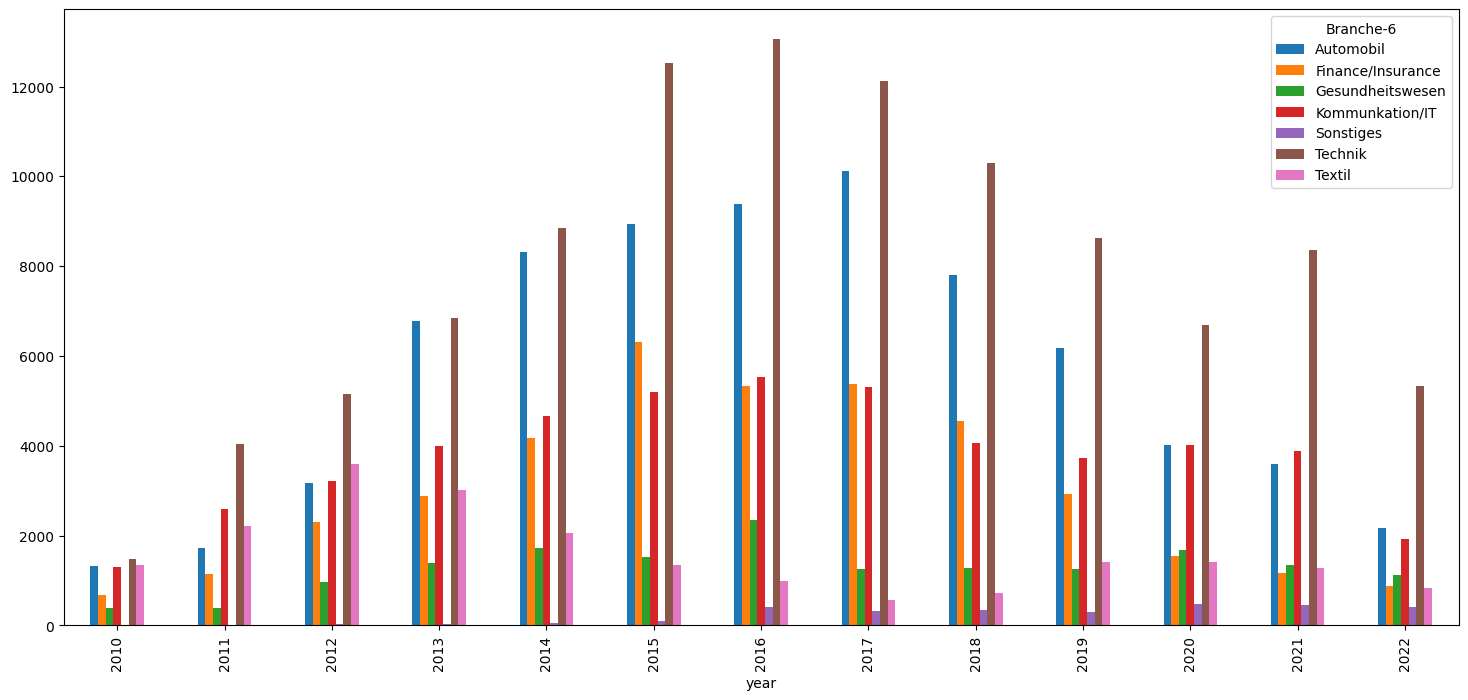

In [19]:
first_grouping = "year"
second_grouping = "Branche-6"
data.groupby([first_grouping, second_grouping]).count()['post_text'].unstack().plot.bar(figsize = figsize)

#### Table Data
Set the groupby variable and run

In [20]:
groupby = "Branche-6" # options "author", "Branche-6", "B2C", "year"

In [21]:
variables_to_aggregate = {
        'post_text':'count', 
        'likes':'mean'}
if 'nstagram' in folder:
        variables_to_aggregate['comments'] = 'mean'
else:
        variables_to_aggregate['retweets'] = 'mean'
        variables_to_aggregate['replies'] = 'mean'
        variables_to_aggregate['quotes'] = 'mean'
renamed_columns = {}
for key, value in variables_to_aggregate.items():
        renamed_columns[key] = str(key)+"_"+str(value)
        if(key =='post_text'):
                renamed_columns[key] = "_"+str(key)+"_"+str(value)
num_greens = green.groupby([groupby]) \
        .agg(variables_to_aggregate) \
        .rename(columns=renamed_columns) \
        .reset_index().set_index(groupby)
num_tweets = data.groupby([groupby]) \
        .agg(variables_to_aggregate) \
       .rename(columns=renamed_columns) \
        .reset_index() \
        .set_index(groupby)
comparison = num_tweets.join(num_greens, lsuffix="_all", rsuffix="_green", sort=True)
comparison['_percentage_green'] = round(comparison['_post_text_count_green']*100.0/comparison['_post_text_count_all'],1)
comparison.sort_values(by=['_percentage_green']).reindex(sorted(comparison.columns), axis=1)

,_percentage_green,_post_text_count_all,_post_text_count_green,likes_mean_all,likes_mean_green,quotes_mean_all,quotes_mean_green,replies_mean_all,replies_mean_green,retweets_mean_all,retweets_mean_green
Branche-6,,,,,,,,,,,
Gesundheitswesen,1.2,16658,202,10.238084,5.386139,0.200024,0.133663,0.328731,0.232673,5.107936,2.683168
Textil,1.4,20818,287,130.185224,122.174216,2.827601,1.641115,4.357671,3.665505,169.317994,52.717770
Automobil,3.1,73526,2309,167.615565,168.605890,2.353902,3.015158,5.280404,5.584669,50.222316,30.345171
Kommunkation/IT,4.7,49463,2337,15.037846,12.706889,0.449730,0.528027,0.840770,0.778776,9.192164,6.821994
Finance/Insurance,7.7,39291,3039,6.354356,8.268509,0.227838,0.338927,0.562852,1.835472,6.173246,11.936163
Technik,13.7,103431,14190,30.971527,33.228964,0.546345,0.547639,0.994586,1.076392,15.012540,11.728894
Sonstiges,15.5,2944,455,4.257133,4.606593,0.246603,0.248352,0.388247,0.378022,2.031929,1.175824
